In [3]:
#Import everything
import pandas as pd
import h5py
import os,json, sys
import shutil
#import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import csv
import netCDF4 as nc
import scipy
from pyproj import Proj, transform
from scipy import interpolate, io
#from IPython import get_ipython

import warnings
warnings.filterwarnings("ignore")

from pyproj import Proj, transform
import powerlaw

from datetime import datetime
#from shapely.geometry import Polygon, Point
#import geopandas
import rasterio
import scipy.stats

# floe size distribution for all data

In [47]:
df=pd.read_csv('/Volumes/Extreme SSD/notforChris/segmentation_output/df_all_withloc.csv', index_col=0)

In [48]:
x=np.arange(5,305,5)
px=(1-fit.power_law.alpha)/(300**(1-fit.power_law.alpha)-5**(1-fit.power_law.alpha))*x**(-fit.power_law.alpha)

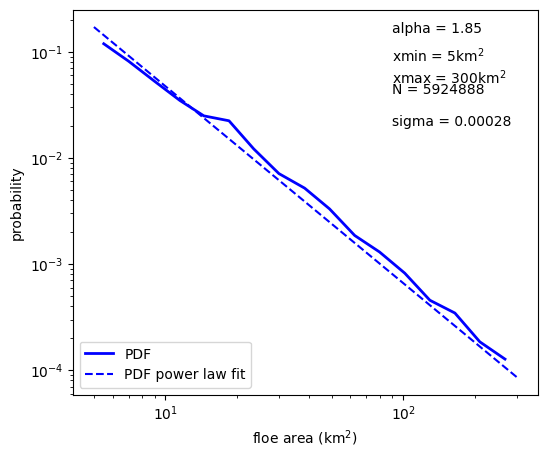

In [49]:
xmin=5
xmax=300
data=df.area_km
fit = powerlaw.Fit(data,xmin=xmin,xmax=xmax)
fig2,ax=plt.subplots(1,1,figsize=(6,5))
fig2 = fit.plot_pdf(color='b', linewidth=2)
#plt.scatter(x,px)
fit.power_law.plot_pdf(color='b', ax=fig2, linestyle='--')
# fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
# fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)
# #fit.lognormal.plot_ccdf(ax=fig2, color='g', linestyle='--')
#fit.truncated_power_law.plot_ccdf(ax=fig2, color='k', linestyle='--')
#fig2.set_xticks(np.arange(50,100,10));
fig2.set_xlabel('floe area (km$^2$)')
fig2.set_ylabel('probability')
plt.text(90,.15,'alpha = '+str(np.round(fit.power_law.alpha,2)))
plt.text(90,.08,'xmin = '+str(xmin)+'km$^2$')
plt.text(90,.05,'xmax = '+str(xmax)+'km$^2$')
plt.text(90,.04,'N = '+str(len(df[(df.area>xmin)&(df.area<xmax)])))
plt.text(90,.02,'sigma = '+str(np.round(fit.power_law.sigma,5)))
#fig2.set_xticks(np.arange(10,90,10),labels=['10','20','30','40','50','60','70','80']);
plt.legend(['PDF','PDF power law fit','CDF','CDF power law fit'],loc=3)
#plt.legend(['PDF','CDF'])
#plt.savefig('/Volumes/Extreme SSD/IFT_output/PDF_CDF_alldata.png')

## Every year

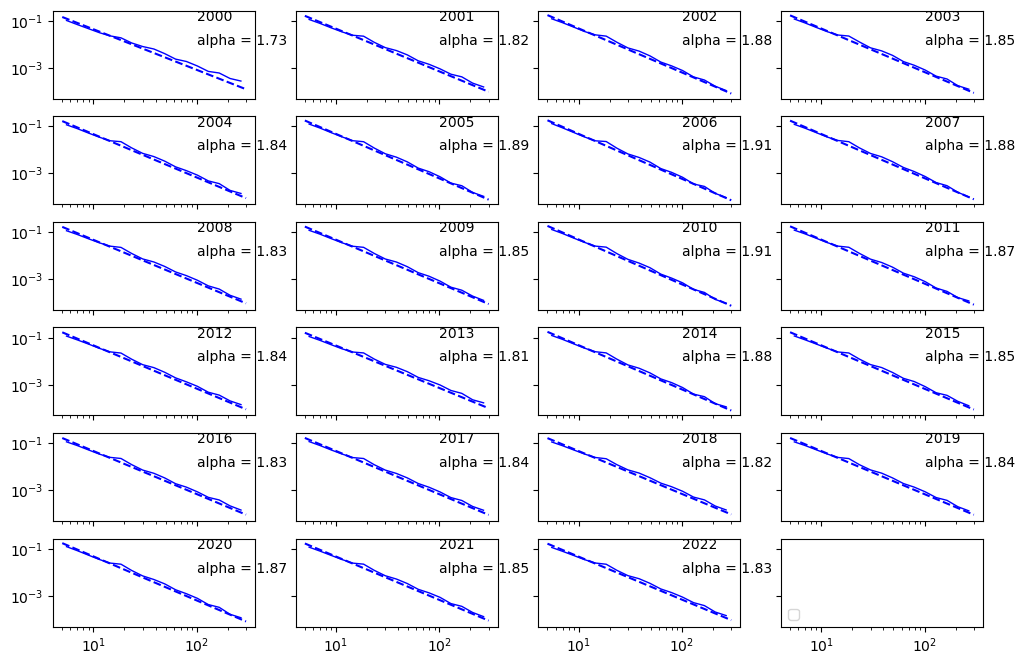

In [13]:
xmin=5
xmax=300
fig,ax=plt.subplots(6,4,figsize=(12,8),sharex=True,sharey=True)
i=0
alphas=[]
yrs=[]
for y in np.arange(2000,2023,1):
    data=df[df.year==y].area_km
    try:
        fit = powerlaw.Fit(data,xmin=xmin,xmax=xmax)
        fit.plot_pdf(color='b', linewidth=1,ax=ax.ravel()[i])
        fit.power_law.plot_pdf(color='b', ax=ax.ravel()[i], linestyle='--')
        # fit.plot_ccdf(color='r', linewidth=2, ax=ax[i])
        # fit.power_law.plot_ccdf(color='r', linestyle='--', ax=ax[i])
        #fit.lognormal.plot_ccdf(ax=fig2, color='g', linestyle='--')
        #fit.truncated_power_law.plot_ccdf(ax=fig2, color='k', linestyle='--')
        #fig2.set_xticks(np.arange(50,100,10));
        #fig2.set_xlabel('floe area (km$^2$)')
        #fig2.set_ylabel('probability')
        # plt.text(90,1,'alpha = '+str(np.round(fit.power_law.alpha,2)))
        # plt.text(90,.55,'xmin = '+str(xmin)+'km$^2$')
        # plt.text(90,.25,'xmax = '+str(xmax)+'km$^2$')
        # plt.text(90,.12,'N = '+str(len(df[(df.area>xmin)&(df.area<xmax)])))
        yrs=np.append(yrs,y)
        alphas=np.append(alphas,fit.power_law.alpha)
    except:
        pass
    ax.ravel()[i].text(100,.1,str(y))
    ax.ravel()[i].text(100,.01,'alpha = '+str(np.round(fit.power_law.alpha,2)))
    i+=1
#fig2.set_xticks(np.arange(10,90,10),labels=['10','20','30','40','50','60','70','80']);
plt.legend(['PDF','PDF power law fit','CDF','CDF power law fit'],loc=3)
#plt.legend(['PDF','CDF'])
plt.savefig('/Volumes/Extreme SSD/IFT_output/PDF_CDF_each_year.png')

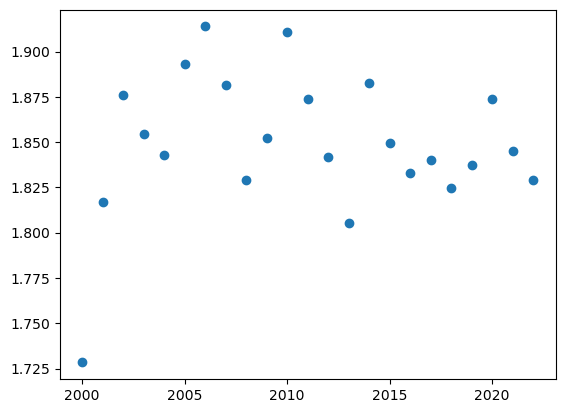

In [14]:
plt.scatter(yrs,alphas)

## March v August

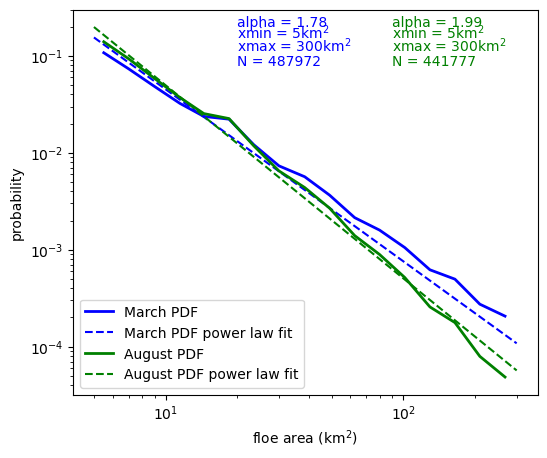

In [15]:
xmin=5
xmax=300
data=df.area_km[df.doy<90]
data2=df.area_km[(df.doy>213)&(df.doy<244)]
fit = powerlaw.Fit(data,xmin=xmin,xmax=xmax)
fig2,ax=plt.subplots(1,1,figsize=(6,5))
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', ax=fig2, linestyle='--')

fit2 = powerlaw.Fit(data2,xmin=xmin,xmax=xmax)
#fig2,ax=plt.subplots(1,1,figsize=(6,5))
fit2.plot_pdf(color='g', ax=fig2, linewidth=2)
fit2.power_law.plot_pdf(color='g', ax=fig2, linestyle='--')
#fit.lognormal.plot_ccdf(ax=fig2, color='g', linestyle='--')
#fit.truncated_power_law.plot_ccdf(ax=fig2, color='k', linestyle='--')
#fig2.set_xticks(np.arange(50,100,10));
fig2.set_xlabel('floe area (km$^2$)')
fig2.set_ylabel('probability')
plt.text(20,.2,'alpha = '+str(np.round(fit.power_law.alpha,2)),color='b')
plt.text(20,.15,'xmin = '+str(xmin)+'km$^2$',color='b')
plt.text(20,.11,'xmax = '+str(xmax)+'km$^2$',color='b')
plt.text(20,.08,'N = '+str(len(df[(df.area>xmin)&(df.area<xmax)&(df.doy<90)])),color='b')

plt.text(90,.2,'alpha = '+str(np.round(fit2.power_law.alpha,2)),color='g')
plt.text(90,.15,'xmin = '+str(xmin)+'km$^2$',color='g')
plt.text(90,.11,'xmax = '+str(xmax)+'km$^2$',color='g')
plt.text(90,.08,'N = '+str(len(df[(df.area>xmin)&(df.area<xmax)&(df.doy>213)&(df.doy<244)])),color='g')

#fig2.set_xticks(np.arange(10,90,10),labels=['10','20','30','40','50','60','70','80']);
plt.legend(['March PDF','March PDF power law fit','August PDF','August PDF power law fit'],loc=3)
#plt.legend(['PDF','CDF'])
#plt.savefig('/Volumes/Extreme SSD/IFT_output/PDF_CDF_MarchvAugust.png')
plt.savefig('/Volumes/Extreme SSD/IFT_output/PDF_CDF_MarchvAugust_2007.png')

## location of floes

In [89]:
image_file = "/Volumes/Extreme SSD/just_beaufort/tci/tci_2003-09-05_248_terra.tiff"
dataset = rasterio.open(image_file)

In [90]:
pixel_pos = [dataset.index(*pos) for pos in zip(df['centroid-0'], df['centroid-1'])]

In [91]:
band1 = dataset.read(1)
#print('Band1 has shape', band1.shape)
height = band1.shape[0]
width = band1.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
xs, ys = rasterio.transform.xy(dataset.transform, rows, cols)
ys_vals=[a[0] for a in ys]

In [92]:
f = interpolate.interp1d(np.arange(0,band1.shape[1]),xs[0])
# the fifth column Centroid (1) of the 99th day that the IFT is run on is the x pixel location
#x_new = [a[5] for a in prop['properties'][0][99]]
# convert the centroid values from pixel location to polar sterographic coordinates indicated in x1_region
x2 = f(df['centroid-1'].values.astype(float))

f = interpolate.interp1d(np.arange(0,band1.shape[0]),ys_vals)
# # the sixth column Centroid (2) of the 99th day that the IFT is run on is the y pixel location
# y_new = [a[6] for a in prop['properties'][0][99]]
y2 = f(df['centroid-0'].values.astype(float))

In [93]:
df['lon_ps']=x2
df['lat_ps']=y2

In [94]:
# convert to polar stereographic coords
inProj = Proj(init='epsg:3413')
outProj = Proj(init='epsg:4326')
x1=df.lon_ps
y1=df.lat_ps
x2,y2 = transform(inProj,outProj,x1,y1)
df['lon']=x2
df['lat']=y2

In [95]:
df.to_csv('/Volumes/Extreme SSD/IFT_output_2/df_all_withloc.csv')

# Evolution

In [4]:
df=pd.read_csv('/Volumes/Extreme SSD/notforChris/segmentation_output/df_all_withloc.csv',index_col=0)

In [5]:
len(df)


9448563

In [6]:
len(df[(df.area_km>=5)&(df.area_km<=300)])/len(df)

0.9678065331204332

In [8]:
df_stats_all=pd.read_csv('/Users/ellenbuckley/Documents/Analysis/FSD/mask_values/df_stats_all2.csv',index_col=0)
# doy, ice_mask (pix), unmasked (pix), sic (%)
#f.write(str(doy)+ '\t' +str(sum(sum(ice_mask)))+ '\t'+str(sum(sum(~(land_mask+cloud_mask))))+ '\t'+str(sum(sum(ice_mask))/sum(sum(~(land_mask+cloud_mask))))+'\n')

In [6]:
xmin=5
xmax=300

In [7]:
df['ecc']=df.axis_major_length/df.axis_minor_length

In [9]:
#df=df[df.area_km<300]
df_temp=df[(df.area_km>=5)&(df.area_km<=300)]
slopes=[]
slope_std=[]
mean_area=[]
std_area=[]
mean_circ=[]
med_area=[]
p75_area=[]
p25_area=[]
#mean_sic=[]
leng=[]
count_perkm=[]
count_perice=[]
ori=[]
ori_std=[]
ori_std_2=[]
ori_std_3=[]
ori_std_4=[]
circ_large=[]
pred_mean=[]
win=2
for a in np.arange(65,270,5):
    results = powerlaw.Fit(df_temp.area_km[(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))],xmin=xmin,xmax=xmax)
    slopes=np.append(slopes,results.alpha)
    slope_std=np.append(slope_std, results.sigma)
    mean_area=np.append(mean_area,np.mean(df_temp.area_km[(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))]))
    std_area=np.append(std_area,np.std(df_temp.area_km[(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))]))
    med_area=np.append(med_area,np.median(df_temp.area_km[(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))]))
    p25_area=np.append(p25_area,np.percentile(df_temp.area_km[(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))],25))
    p75_area=np.append(p75_area,np.percentile(df_temp.area_km[(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))],75))
    #print(a,np.mean(df.area_km[(df.doy>=(a-5))&(df.doy<(a+5))])/(df3[df3.doy==a].unmasked.values[0]*.25*.25))
    #count_perkm=np.append(count_perkm,np.mean(df.area_km[(df.doy>=(a-5))&(df.doy<(a+5))])/(df3[df3.doy==a].unmasked.values[0]*.25*.25))
    #count_perice=np.append(count_perice,np.mean(df.area_km[(df.doy>=(a-5))&(df.doy<(a+5))])/(df3[df3.doy==a].ice_area.values[0]*.25*.25))
    mean_circ=np.append(mean_circ,np.mean(df_temp.circ[(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))]))
    circ_large=np.append(circ_large,np.mean(df_temp.circ[(df_temp.area_km>200)&(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))]))
    ori=np.append(ori,np.mean(df_temp.orientation[(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))]))
    ori_std=np.append(ori_std,scipy.stats.circstd(df_temp.orientation[(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))],high=np.pi/2,low=-np.pi/2))
    ori_std_2=np.append(ori_std_2,scipy.stats.circstd(df_temp.orientation[(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))&(df_temp.ecc>np.percentile(df.ecc,75))],high=np.pi/2,low=-np.pi/2))
    ori_std_3=np.append(ori_std_3,scipy.stats.circstd(df_temp.orientation[(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))&(df_temp.area_km>np.percentile(df.area_km,75))],high=np.pi/2,low=-np.pi/2))
    ori_std_4=np.append(ori_std_4,scipy.stats.circstd(df_temp.orientation[(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))&(df_temp.circ<np.percentile(df.circ,25))],high=np.pi/2,low=-np.pi/2))
    #mean_sic=np.append(mean_sic,np.mean(df.sic_cdr[(df.doy>=(a-5))&(df.doy<(a+5))&(df.sic_cdr<=1)]))
    leng=np.append(leng,len(df_temp[(df_temp.doy>=(a-win))&(df_temp.doy<(a+win))]))


## predicted mean, median, c values

In [10]:
x1=5
x2=300
pred_mean2= [(1-a)/((x2**(1-a))-(x1**(1-a)))/(2-a)*((x2**(2-a))-(x1**(2-a))) for a in slopes]
pred_mean = [ ((a-1)*(x2**2*x1**a-x1**2*x2**a)/((a-2)*(x2*x1**a-x1*x2**a))) for a in slopes]
# pred_med=[(0.5+(x1*x2**a)/(x2*x1**a-x1*x2**a))*(((x2*x1**a)-(x1*x2**a))/((x1*x2)**a)) for a in slopes]

d=5
b=300
x1=5
x2=300
pred_med=[(-b**(-c)* d**(-c) *(b**c* d - b* d**c) *(0.5 - (b**c* d)/(b**c *d - b* d**c)))**(1/(1-c)) for c in slopes]
pred_med2=[(((1-a)/(2*(1-a)/((x2**(1-a))-(x1**(1-a))))+x1**(1-a))**(1/(1-a))) for a in slopes]

x1=5
x2=300
a=1.85
c=(1-a)/(x2**(1-a)-x1**(1-a))

In [12]:
results = powerlaw.Fit(df.area_km,xmin=xmin,xmax=xmax)
a_base=results.alpha
# window for analysis- win=2 for 5 day running window
win=2


In [21]:
ice_area=[]
unmasked=[]
for a in np.arange(65,270,5):
    ice_area=np.append(ice_area,np.sum(df_stats_all[(df_stats_all.doy>=(a-win))&(df_stats_all.doy<(a+win))].ice_area))
    unmasked=np.append(unmasked,np.sum(df_stats_all[(df_stats_all.doy>=(a-win))&(df_stats_all.doy<(a+win))].unmasked))

In [10]:
outfile='/Users/ellenbuckley/Downloads/reproj_land.tiff'
s=rasterio.open(outfile)
land_mask=(s.read()[0])==75

In [39]:
area_land=np.sum(land_mask)#/(1e6*.25*.25)#*5

In [40]:
area_land/area_image

0.16826424130831275

In [56]:
100-np.mean((unmasked)/area_image)

68.12837390652454

In [59]:
area_image

21576248

In [63]:
100-np.mean((unmasked-area_land)/(area_image-area_land))

61.88289186695996

In [27]:
area_image=land_mask.shape[0]*land_mask.shape[1]

In [28]:
land_mask.shape[0]*land_mask.shape[1]/(.25*.25) # in square km

345219968.0

In [29]:
landmask_area=np.sum(land_mask)/(.25*.25) # total area of land mask in square km

In [47]:
cloud_area=unmasked-landmask_area #cloud area

In [51]:
np.mean(cloud_area)/area_image

29.17939823254245

In [52]:
df_stats_all['cloud_area']=area_image-df_stats_all.unmasked-np.sum(land_mask)

In [53]:
df_stats_all['cloud_frac']=df_stats_all.cloud_area/(area_image-np.sum(land_mask))

In [55]:
np.mean(df_stats_all.cloud_frac)

0.5816850510752096

In [73]:
100-np.mean(unmasked/area_image)

68.12837390652454

In [32]:
x=np.arange(65,270,5)

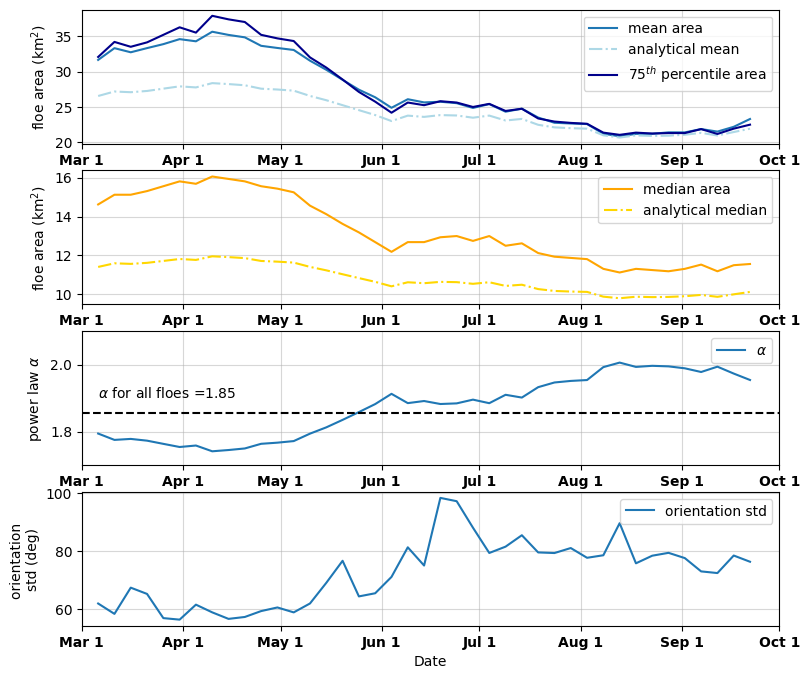

In [23]:
fig,ax=plt.subplots(4,1,figsize=(9,8))
x=np.arange(65,270,5)

#ax[1].plot(x,count_perkm/.25/.25)
ax[0].plot(x,mean_area,label='mean area')#r'$\mu$')
ax[0].plot(x,mean_area,label='mean area')#r'$\mu$')

# ax[0]=ax[0].twinx()
ax[0].plot(x,pred_mean2,label='analytical mean',linestyle='dashdot',c='lightblue')#r'$\mu$')
#ax[0].plot(x,pred_mean2,label='analytical mean',linestyle='-',c='blue')
#ax[0].fill_between(x,mean_area-2*std_area,mean_area+2*std_area,label=r'$\mu$ + 2$\sigma$')
ax[1].plot(x,med_area,c='orange',label='median area')
ax[0].plot(x,p75_area,color='darkblue',label='75$^{th}$ percentile area')
ax[1].plot(x,pred_med2,label='analytical median',linestyle='dashdot',c='gold')#r'$\mu$')
#ax0.plot(x,p25_area,c='orange',label='25th/75th perc', linestyle='dashed')
#ax0.plot(x,p75_area,c='orange', linestyle='dashed')
#ax[1].plot(x,mean_circ)
#ax[1].plot(x,circ_large,c='g')

ax[2].plot(x,slopes,label=r'$\alpha$' )
# ax2=ax[2].twinx()
# ax2.plot(x,2*slopes-1,c='red')#,label=r'$\alpha$' )
#ax[1].plot(x,slope_std)
#ax[1].fill_between(x,slopes-2*slope_std, slopes+2*slope_std,alpha=0.4,label=r'$\alpha$ + 2$\sigma$')
ax[2].text(65,1.9,r'$\alpha$ for all floes ='+str(np.round(a_base,2)))
#ax[1].legend()
ax[3].plot(x,np.rad2deg(ori_std), label='orientation std')
#ax[3].plot(x,np.rad2deg(ori_std_2),c='orange',label='high eccentricity')
#ax[3].plot(x,np.rad2deg(ori_std_3),c='red',label='large floes')
#ax[3].plot(x,np.rad2deg(ori_std_4),c='green',label='low circularity')
#ax4.scatter(x, leng,c='k')
# ax4=ax[4].twinx()


# ax[4].bar(x,(unmasked-ice_area)/1e6*.25*.25,color='b',width=4.5, label='open water',bottom= 0)
# bottom=(unmasked-ice_area)/1e6*.25*.25
# ax[4].bar(x,ice_area/1e6*.25*.25,color='g',width=4.5, label='ice area',bottom=bottom)
# bottom+=ice_area/1e6*.25*.25
# ax[4].bar(x,(area_image-area_land)*np.ones(len(x))-unmasked/1e6*.25*.25,color='gray',width=4.5, label='cloud mask',bottom= bottom)
# #bottom+=(area_image-area_land)*np.ones(len(x))-unmasked/1e6*.25*.25
# #ax[3].bar(x,area_land*np.ones(len(x)),color='m',width=4.5, label='land mask',bottom= bottom)

# ax4.scatter(x, leng/1e6,c='k', label='number of floes')
# ax4.legend(loc=2)
# ax[4].legend(loc=1)
#ax[0].plot(x,mean_sic*100)
#ax[6].plot(df3.doy,df3.sic)
ax[2].axhline(a_base,c='k',linestyle='dashed')#,label=r'$\alpha$ all floes');

# ax[0].set_title('SIC (%)',x=0.1,y=0.10,fontsize=16,fontweight='bold')
#ax[1].set_title('floe count (km$^{-2}$)',x=0.15,y=0.75,fontsize=16,fontweight='bold')
#ax[1].set_ylim(.0001,.01)
# ax[0].set_title('mean floe area (km$^2$)',x=0.15,y=0.1,fontsize=12,fontweight='bold')
# #ax[1].set_title('mean circularity',x=0.13,y=0.75,fontsize=12,fontweight='bold')
# #ax[1].set_ylim(.55,.65)
# #ax[1].set_ylim(.2,.4)
# ax[1].set_title('power law alpha anomaly',x=0.18,y=0.75,fontsize=12,fontweight='bold')
# #ax[4].set_title('cyclone activity \n (Minimum SLP in area (mb))',x=0.5,y=0.75)
# ax[2].set_title('orientation variability (deg)',x=0.19,y=0.75,fontsize=12,fontweight='bold')

for i in np.arange(0,4):
    ax[i].set_xlim(110,220)
    ax[i].set_xticks(ticks=[60,91,121,152,182,213,244,274],labels=['Mar 1','Apr 1','May 1','Jun 1','Jul 1','Aug 1','Sep 1','Oct 1'],fontweight='bold',fontsize=10);
    ax[i].grid(alpha=0.5)
    #ax[i].axvline(162.278,c='g')
    #ax[i].axvline(149.067,c='g',linestyle='dashed')
    #ax[i].axvline(253.88,c='r')
    #ax[i].axvline(261.664,c='r',linestyle='dashed')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].set_xlabel('Date')
ax[0].set_ylabel('floe area (km$^2$)')
ax[1].set_ylabel('floe area (km$^2$)')
ax[2].set_ylabel('power law $ \\alpha$')
#ax[0].set_ylim(20,40)
#ax[1].set_ylim(8,17)
ax[2].set_ylim(1.7,2.1)
ax[3].set_ylabel('orientation \nstd (deg)')
ax[3].legend()

# ax[4].set_ylabel('area \n(millions km$^2$)')
# ax4.set_ylabel('number of floes \n(millions)')
# ax4.set_ylim(0,.4)
# ax[4].set_ylim(0,(area_image-area_land))
#ax[3].ticklabel_format(style='plain', axis='x')
#ax[0].set_ylim(10,20)
# ax[2].text(65,.40,r'$\alpha$ all floes = 1.85')
plt.savefig('/Users/ellenbuckley/Documents/Analysis/FSD/Evolution_all_years.png',dpi=600)

## image area stats figure

In [79]:
cloud_gb_year=df_stats_all.groupby(df_stats_all['year'])['cloud_frac'].agg(['sum', 'std','mean', 'max'])
cloud_gb_doy=df_stats_all.groupby(df_stats_all['doy'])['cloud_frac'].agg(['sum', 'std','mean', 'max'])

In [80]:
area_gb_year=df.groupby(df['year']).area.agg(['sum', 'count','std','mean', 'max'])
area_gb_doy=df.groupby(df['doy']).area.agg(['sum', 'count','std','mean', 'max'])

In [81]:
ar_gb_year=df_stats_all.groupby(df_stats_all['year'])['ice_area'].agg(['sum', 'std','mean', 'max'])
ar_gb_doy=df_stats_all.groupby(df_stats_all['doy'])['ice_area'].agg(['sum', 'std','mean', 'max'])

In [83]:
np.mean(df_stats_all.cloud_frac)

0.5816850510752096

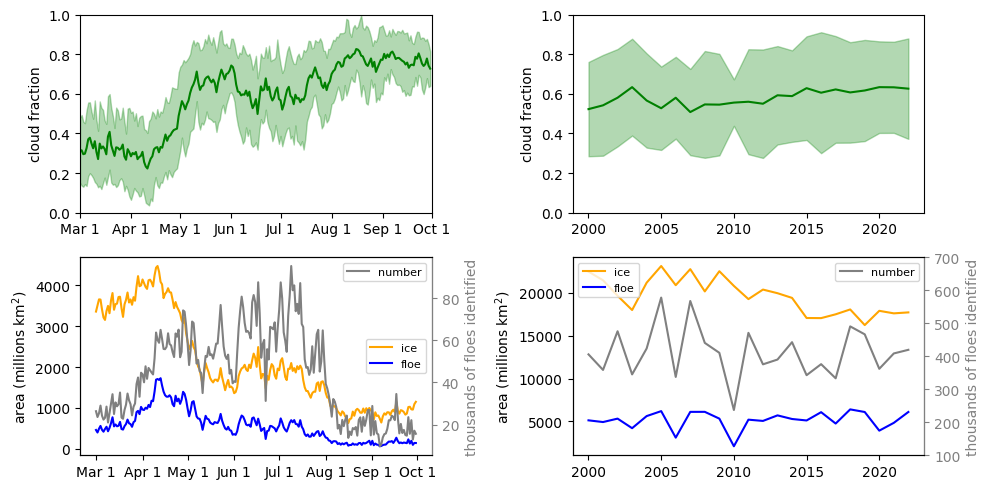

In [96]:
fig,ax=plt.subplots(2,2,figsize=(10,5))

# cloud fraction by doy
ax[0,0].plot(cloud_gb_doy['mean'],color='green')
ax[0,0].fill_between(cloud_gb_doy.index, cloud_gb_doy['mean']+cloud_gb_doy['std'], cloud_gb_doy['mean']-cloud_gb_doy['std'], color='green', alpha=0.3)
ax[0,0].set_ylim(0,1)
ax[0,0].set_xlim(60,270)
ax[0,0].set_xticks(ticks=[60,91,121,152,182,213,244,274],labels=['Mar 1','Apr 1','May 1','Jun 1','Jul 1','Aug 1','Sep 1','Oct 1'],fontsize=10);
ax[0,0].set_ylabel('cloud fraction')    
#cloud fraction be year
ax[0,1].plot(cloud_gb_year['mean'],color='green')
ax[0,1].fill_between(cloud_gb_year.index, cloud_gb_year['mean']+cloud_gb_year['std'], cloud_gb_year['mean']-cloud_gb_year['std'],color='green', alpha=0.3)
ax[0,1].set_ylim(0,1)
ax[0,1].set_ylabel('cloud fraction')
# #ice area by doy

ax[1,0].plot(ar_gb_doy['sum']/(.25*.25*1e6),color='orange', label='ice')
#ax[1,0].fill_between(ar_gb_doy.index, ar_gb_doy['mean']+ar_gb_doy['std'], ar_gb_doy['mean']-ar_gb_doy['std'], color='orange', alpha=0.3)
ax[1,0].plot(area_gb_doy['sum']/(.25*.25*1e6),color='blue',label='floe')
#ax[1,0].fill_between(area_gb_doy.index, area_gb_doy['mean']+area_gb_doy['std'], area_gb_doy['mean']-area_gb_doy['std'], color='blue', alpha=0.3)

ax[1,0].set_xticks(ticks=[60,91,121,152,182,213,244,274],labels=['Mar 1','Apr 1','May 1','Jun 1','Jul 1','Aug 1','Sep 1','Oct 1'],fontsize=10);
ax[1,0].set_ylabel('area (millions km$^2$)')
ax[1,0].legend(fontsize=8,loc=5)
# #ice area by year
ax2=ax[1,0].twinx()
ax2.plot(area_gb_doy['count']/1000,color='gray', label='number')
ax2.set_ylabel('thousands of floes identified', color='gray')
ax2.legend(fontsize=8,loc=1)
ax2.spines['right'].set_color('gray')
ax2.tick_params(colors='gray',axis='y')
ax3=ax[1,1].twinx()
ax3.set_ylim(0,100)
ax[1,1].plot(ar_gb_year['sum']/(.25*.25*1e6),color='orange', label='ice')
#ax[1,1].fill_between(ar_gb_year.index, ar_gb_year['mean']+ar_gb_year['std'], ar_gb_year['mean']-ar_gb_year['std'], color='orange', alpha=0.3)
ax[1,1].plot(area_gb_year['sum']/(.25*.25*1e6),color='blue', label='floe')
#ax[1,1].fill_between(area_gb_year.index, area_gb_year['mean']+area_gb_year['std'], area_gb_year['mean']-area_gb_year['std'], color='blue', alpha=0.3)
ax[1,1].legend(fontsize=8,loc=2)
ax[1,1].set_ylabel('area (millions km$^2$)')


ax3.plot(area_gb_year['count']/1000,color='gray', label='number')
ax3.set_ylabel('thousands of floes identified', color='gray')
ax3.set_ylim(100,700)

ax3.spines['right'].set_color('gray')
ax3.tick_params(colors='gray',axis='y')
#ax3.yaxis.label.set_color('gray')

ax3.legend(fontsize=8,loc=1)
plt.tight_layout()
plt.savefig('/Users/ellenbuckley/Documents/Analysis/FSD/cloud_ice_area.png',dpi=600)

In [237]:
area_image/(.25*.25*1e6)

345.219968

In [242]:
345*23*.7*.9

4999.05

In [180]:
df_gb_year=df.groupby(df['year']).area_km.agg(['sum','mean','std','count','median'])

## relationships

In [ ]:
import seaborn as sns

Text(0, 0.5, 'floe circularity')

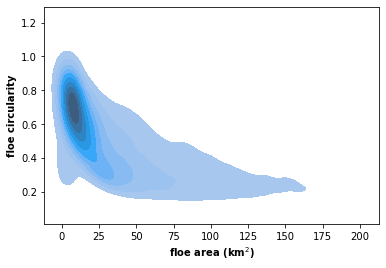

In [ ]:
#plt.hist2d(df.area_km,df.circ,bins=(np.arange(0,100,1),np.arange(.2,1,.01)));#,alpha=.4,s=1)
plt.subplots(1,1,figsize=(6,4))
sns.kdeplot(data=df[df.area_km<200], x='area_km', y='circ',fill=True)
plt.xlabel('floe area (km$^2$)',fontweight='bold')
plt.ylabel('floe circularity',fontweight='bold')

In [ ]:
pl

(0.3, 1.0)

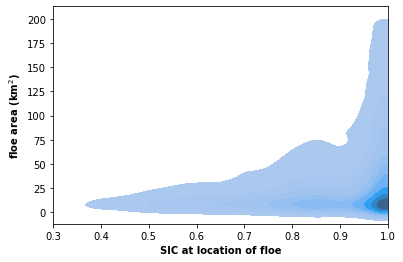

In [ ]:
plt.subplots(1,1,figsize=(6,4))
sns.kdeplot(data=df[(df.area_km<200)&(df.sic_cdr<=1)], x='sic_cdr', y='area_km',fill=True)
plt.xlabel('SIC at location of floe',fontweight='bold')
plt.ylabel('floe area (km$^2$)',fontweight='bold')
plt.xlim(0.3,1)

### decadal patterns

In [ ]:
df.to_csv('df_all_local.csv')

In [ ]:
df=pd.read_csv('df_all_local.csv')

In [ ]:
xmin=5
xmax=300
doys=[60,91,121,152,182,213,244,274]
df_res=pd.DataFrame(columns=['y','m','alpha','sigma'])
for y in np.arange(2000,2023):
    for m in np.arange(0,7,1):
        df_temp=df[(df.year==y)&(df.doy>doys[m])&(df.doy<doys[m+1])]
        results = powerlaw.Fit(df_temp.area_km,xmin=xmin,xmax=xmax)
        df_res=pd.concat([df_res,pd.DataFrame(columns=['y','m','alpha','sigma'],data=[[y,m,results.alpha,results.sigma]])])


Not enough data. Returning nan
Not enough data. Returning nan
Not enough data. Returning nan
Not enough data. Returning nan
Not enough data. Returning nan


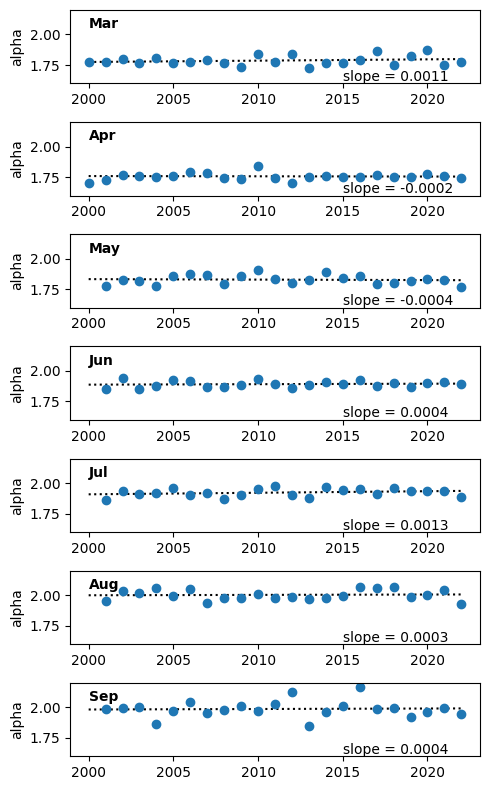

In [42]:
fig,ax=plt.subplots(7,1,figsize=(5,8))
months=['Mar','Apr','May','Jun','Jul','Aug','Sep']
for m in np.arange(0,7,1):
    df_temp=df_res[df_res.m==m]
    ax[m].scatter(df_temp.y,df_temp.alpha,s=8)
    a, b = np.polyfit(list(df_temp.y.values[1:]), list(df_temp.alpha.values[1:]), 1)
    ax[m].plot(np.arange(2000,2023,1),a*np.arange(2000,2023,1)+b, linestyle='dotted',c='k')
    ax[m].errorbar(df_temp.y,df_temp.alpha, yerr=df_temp.sigma, fmt="o")
    ax[m].set_ylim(1.6,2.2)
    ax[m].text(2015,1.62,'slope = '+str(np.round(a,4)))
    ax[m].text(2000,2.05,months[m],fontweight='bold')
    ax[m].set_ylabel('alpha')
    plt.tight_layout()
plt.savefig('slopes_decades.png')